In [21]:
from pandas import DataFrame, read_csv

# General syntax to import a library but no functions: 
##import (library) as (give the library a nickname/alias)
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number
import numpy as np
from langdetect import detect_langs #detect lang
from langdetect import detect #detect lang

# Enable inline plotting
%matplotlib inline

print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 3.8.5 (default, Sep  4 2020, 07:30:14) 
[GCC 7.3.0]
Pandas version 1.1.5
Matplotlib version 3.3.2


In [33]:
import glob

path = r'/home/anda/DL/ranalyzer/2021'
all_files = glob.glob(path + "/*.csv")
print(all_files)
li = []

for filename in all_files:
    df = pd.read_csv(filename, engine = 'python', index_col=None, header=0, encoding='utf-16')
    li.append(df)
# print(li)
    
raw_data = pd.concat(li, axis=0, ignore_index=True)
raw_data.info()

['/home/anda/DL/ranalyzer/2021/reviews_reviews_com.quipper.school.assignment_202107.csv', '/home/anda/DL/ranalyzer/2021/reviews_reviews_com.quipper.school.assignment_202108.csv']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 833 entries, 0 to 832
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Package Name                           833 non-null    object 
 1   App Version Code                       650 non-null    float64
 2   App Version Name                       650 non-null    object 
 3   Reviewer Language                      833 non-null    object 
 4   Device                                 833 non-null    object 
 5   Review Submit Date and Time            833 non-null    object 
 6   Review Submit Millis Since Epoch       833 non-null    int64  
 7   Review Last Update Date and Time       833 non-null    object 
 8   Review Last Update Millis Since

<AxesSubplot:>

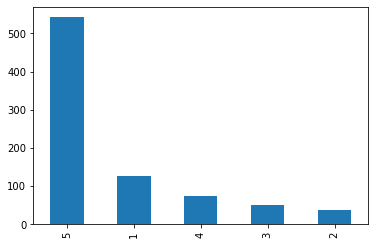

In [28]:
raw_data['Star Rating'].value_counts().plot(kind='bar')

In [29]:
is_bad_rating = raw_data['Star Rating'] <= 4
is_review_available = pd.notnull(raw_data['Review Text'])
is_no_review = pd.isnull(raw_data['Review Text'])
bad_ratting_no_review = raw_data[is_bad_rating & is_no_review]
bad_ratting_with_review = raw_data[is_bad_rating & is_review_available]
print("with review: ", len(bad_ratting_with_review), " vs no review: ", len(bad_ratting_no_review))

with review:  165  vs no review:  126


In [31]:
bad_ratting_with_review[['Star Rating', 'Review Text', 'App Version Name']][100:150]

,Star Rating,Review Text,App Version Name
634,1,Ntah lh,6.1.5
647,2,🗿🗿🗿🗿🗿🗿 banyak bug kadang suka wkeluar sendiri.,6.1.5
650,1,"Woy apk apaan sih ini ga jelas,,,,,masa ada tu...",6.1.2
656,1,Sering error aplikasinya,6.1.5
661,1,"Apk ga jelas banyak bug, sering tiba² keluar s...",6.1.5
665,1,I can't log in my acc which my teacher gave me.,NaN
668,1,Sebelom di update aman² aja gak ada kendala ta...,6.1.5
670,2,Kenapa ya setelah diupdate malah sering keluar...,NaN
671,1,why it always crash when open and some of the ...,NaN
674,3,Lgi mau ngerjain soal gambarnya gk muncul pada...,NaN


In [6]:
def check_review_text(text):
    if (isinstance(text, pd.Series)):
        return ' '.join(text)
    else:
         return text   

In [7]:
review_text =  bad_ratting_with_review['Review Text'] 
# print(check_review_text(review_text[163]))
# for review in review_text:
#     text = check_review_text(review)
#     print(text)
list_text = map(check_review_text, review_text)
print(len(list(list_text)), len(review_text))

670 670
